## Importing dependencies

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data collection and Processing

In [55]:
# Loading data from csv file to pandas dataframe
data = pd.read_csv('car data.csv')

In [56]:
# Inspecting the data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
# checking the number of rows and columns
data.shape

(301, 9)

In [58]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [59]:
# Checking the number of missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [60]:
# Checking the distribution of categorical data
print(data.Fuel_Type.value_counts())
print("\n", data.Seller_Type.value_counts())
print("\n", data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [61]:
# Encoding "Fuel_Type" column
data.replace({'Fuel_Type': {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}}, inplace= True)

# Encoding "Seller_Type" column
data.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace= True)

# Encoding "Transmission" column
data.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace= True)

In [62]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data and target

In [63]:
x = data.drop(['Car_Name', 'Selling_Price'], axis= 1)
y = data['Selling_Price']

In [64]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [65]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Splitting training and testing data

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 2)

## Model Training

### Linear Regressor

In [67]:
# Loading the linear regressor model
lin_regg = LinearRegression()

In [68]:
lin_regg.fit(x_train, y_train)

LinearRegression()

In [69]:
model_predictions = lin_regg.predict(x_test)

#### Model evaluation

In [70]:
# Testing on training data
lin_regg.score(x_train, y_train)

0.8799451660493708

In [71]:
# testing on test data
lin_regg.score(x_test, y_test)

0.8365766715026535

### Visualize the actual and predicted prices

In [90]:
from matplotlib.lines import Line2D

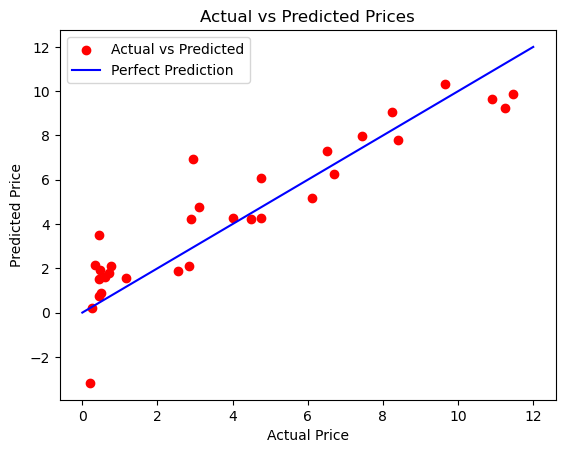

In [96]:
import matplotlib.pyplot as plt

# Assuming y_test and model_predictions are arrays or lists containing actual and predicted prices

plt.scatter(y_test, model_predictions, color='red', label='Actual vs Predicted')
plt.plot([0, 12], [0, 12], color='blue', label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

plt.legend()  # Add legend to distinguish between actual vs predicted and perfect prediction lines
plt.show()


In [73]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [81]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [75]:
import numpy as np

In [76]:
cust_data = (2016, 7.600, 17000, 0, 0, 0, 0)

In [77]:
cust_data = np.asarray(cust_data)
cust_data = cust_data.reshape(1, -1)

In [78]:
cust_data

array([[2.016e+03, 7.600e+00, 1.700e+04, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])

In [79]:
cust_predictions = lin_regg.predict(cust_data)

/Users/jathinnarayan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
cust_predictions

array([5.60702081])

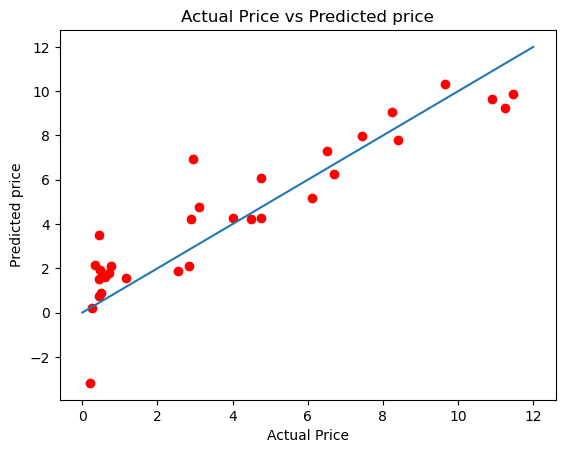

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
line = Line2D([0, 12], [0, 12])
ax.add_line(line)

plt.scatter(y_test, model_predictions, color= 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Price vs Predicted price")

plt.show()